In [35]:
from joblib import dump, load

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import accuracy_score, classification_report, auc, roc_curve

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from ydata_profiling import ProfileReport

In [6]:
df = pd.read_excel("Acoustic_Extinguisher_Fire_Dataset.xlsx")

In [7]:
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [8]:
df = pd.get_dummies(df, columns=['FUEL'], drop_first=True)

In [9]:
profile = ProfileReport(df, title="Profiling Report")

In [10]:
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
solvers = []

In [12]:
X = df.drop('STATUS', axis=1)

In [13]:
y = df['STATUS']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred_train = model.predict(X_train)

In [18]:
y_pred_val = model.predict(X_val)

In [19]:
y_pred_proba = model.predict_proba(X_val)

In [20]:
accuracy_score(y_train, y_pred_train, normalize=True, sample_weight=None)

0.8969718688407096

In [21]:
accuracy_score(y_val, y_pred_val, normalize=True, sample_weight=None)

0.8960945897527768

In [22]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1369
           1       0.91      0.88      0.90      1422

    accuracy                           0.90      2791
   macro avg       0.90      0.90      0.90      2791
weighted avg       0.90      0.90      0.90      2791



In [23]:
y_pred_proba[:,1]

array([0.17867054, 0.02874099, 0.26125723, ..., 0.99861963, 0.04322726,
       0.9971719 ])

In [24]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba[:,1], pos_label=2)

/home/juan/.pyenv/versions/3.9.16/envs/ay_23_01/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [25]:
%matplotlib inline

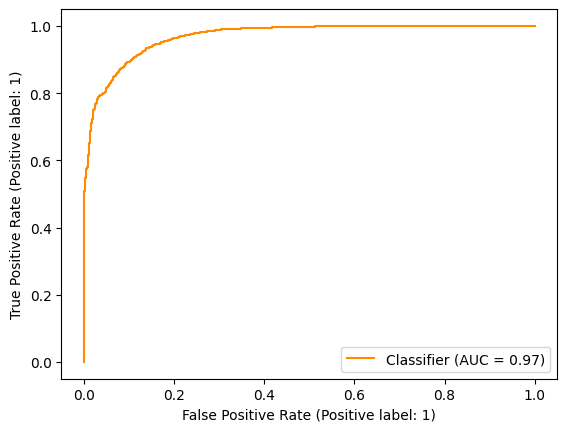

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_val,
    y_pred_proba[:,1],
    color="darkorange"
)

plt.show()

In [36]:
dump(model, 'model.joblib') 

['model.joblib']

In [37]:
loaded_model = load('model.joblib')

In [27]:
from lightgbm import LGBMClassifier
lboost = LGBMClassifier()
lboost.fit(X_train, y_train)

LGBMClassifier()

In [28]:
# try with a forest model

In [29]:
# obtain test metrics

In [30]:
# finish the model

In [31]:
# pickle the model